In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


def load_data_files():
    movies = pd.read_csv("../moviedata/movies.csv")
    ratings = pd.read_csv("../moviedata/ratings.csv")
    return movies, ratings

movies, ratings = load_data_files()

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [4]:
movies.drop_duplicates("title", inplace=True)




In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
merged = movies.merge(ratings, on="movieId")

In [9]:

merged.head()



,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1225734739
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,835815971
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.0,974518024
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.0,1430666394
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,5.0,862500738


In [6]:
merged=merged[merged["timestamp"]%2==0]

In [7]:
merged.head()

,userId,movieId,rating,timestamp,title,genres
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,1,596,4.0,1225733524,Pinocchio (1940),Animation|Children|Fantasy|Musical
7,1,1036,5.0,1225735626,Die Hard (1988),Action|Crime|Thriller
12,1,1210,4.5,1225735210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi


In [8]:
x = merged.groupby("userId").count()
print(x)
x = x[(x["rating"]>80) & (x["rating"]<150)]
expert_users=x.index
merged_xu = merged[merged["userId"].isin(expert_users)]



        movieId  rating  timestamp  title  genres
userId                                           
1            22      22         22     22      22
2            42      42         42     42      42
3            14      14         14     14      14
4            11      11         11     11      11
5            17      17         17     17      17
...         ...     ...        ...    ...     ...
330971       24      24         24     24      24
330972       74      74         74     74      74
330973       10      10         10     10      10
330974       53      53         53     53      53
330975      161     161        161    161     161

[320850 rows x 5 columns]


In [9]:
merged_xu

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance
...,...,...,...,...,...,...
33827679,330967,6966,2.0,1082358820,Darkman (1990),Action|Crime|Fantasy|Sci-Fi|Thriller
33827680,330967,7004,2.0,1082357816,Kindergarten Cop (1990),Action|Comedy|Crime|Thriller
33827682,330967,7017,3.0,1082358926,Passenger 57 (1992),Action|Thriller
33827683,330967,7153,4.5,1082356922,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [10]:
merged_xu.head()

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance


In [11]:
y = merged_xu.groupby("title").count()["rating"]>300
pop_films=y[y].index

merged_xu_pf = merged_xu[merged_xu["title"].isin(pop_films)]

In [12]:
merged_xu_pf.head()

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance


In [68]:
merged_xu_pf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 126.5+ MB


In [13]:
set_of_genres=set()

for j in movies.index:    
    lista=movies["genres"][j].split("|")
    for word in lista:
        set_of_genres.add(word)

print(set_of_genres)

number_of_genres=len(set_of_genres)
number_of_genres

{'Romance', 'Drama', 'IMAX', 'Film-Noir', '(no genres listed)', 'Mystery', 'Animation', 'Western', 'Children', 'War', 'Thriller', 'Fantasy', 'Crime', 'Action', 'Musical', 'Comedy', 'Horror', 'Adventure', 'Documentary', 'Sci-Fi'}


20

In [14]:
# Tar ca 3 minuter
for k in set_of_genres:
    merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7344\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7344\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7344\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [15]:
merged_xu_pf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   movieId             int64  
 2   rating              float64
 3   timestamp           int64  
 4   title               object 
 5   genres              object 
 6   Romance             int64  
 7   Drama               int64  
 8   IMAX                int64  
 9   Film-Noir           int64  
 10  (no genres listed)  int64  
 11  Mystery             int64  
 12  Animation           int64  
 13  Western             int64  
 14  Children            int64  
 15  War                 int64  
 16  Thriller            int64  
 17  Fantasy             int64  
 18  Crime               int64  
 19  Action              int64  
 20  Musical             int64  
 21  Comedy              int64  
 22  Horror              int64  
 23  Adventure           int64  
 24  Documentary         int64 

In [16]:
merged_xu_pf.drop(columns=["timestamp", "movieId", "genres"], inplace=True)
merged_xu_pf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   rating              float64
 2   title               object 
 3   Romance             int64  
 4   Drama               int64  
 5   IMAX                int64  
 6   Film-Noir           int64  
 7   (no genres listed)  int64  
 8   Mystery             int64  
 9   Animation           int64  
 10  Western             int64  
 11  Children            int64  
 12  War                 int64  
 13  Thriller            int64  
 14  Fantasy             int64  
 15  Crime               int64  
 16  Action              int64  
 17  Musical             int64  
 18  Comedy              int64  
 19  Horror              int64  
 20  Adventure           int64  
 21  Documentary         int64  
 22  Sci-Fi              int64  
dtypes: float64(1), int64(21), object(1)
memory usage: 433.8+ MB

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7344\1783787764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf.drop(columns=["timestamp", "movieId", "genres"], inplace=True)


In [17]:
merged_xu_pf.head()


,userId,rating,title,Romance,Drama,IMAX,Film-Noir,(no genres listed),Mystery,Animation,...,Thriller,Fantasy,Crime,Action,Musical,Comedy,Horror,Adventure,Documentary,Sci-Fi
304,7,4.0,Toy Story (1995),0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
307,7,2.0,Get Shorty (1995),0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
308,7,3.0,Leaving Las Vegas (1995),1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,7,4.0,Dead Man Walking (1995),0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
319,7,4.0,Nobody's Fool (1994),1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
design_matrix = merged_xu_pf.pivot_table(index="title", columns=["userId"], values="rating")

design_matrix.fillna(0, inplace=True)
design_matrix

userId,7,9,10,21,35,50,51,57,94,105,...,330887,330920,330921,330931,330933,330934,330938,330947,330948,330967
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def load_data_files():
    tags = pd.read_csv("../moviedata/tags.csv")

    return tags

tags = load_data_files()

In [14]:
tags["tag"].value_counts().unique

<bound method Series.unique of tag
sci-fi             14319
atmospheric        12172
action             10683
comedy             10161
surreal             9142
                   ...  
2D Animation           1
Handdrawn              1
Redline prequel        1
Kamurocho              1
the Dragon             1
Name: count, Length: 153949, dtype: int64>

In [12]:
x = tags.groupby("tag").count()

x = x[x["movieId"]>1000]
common_tags=x.index
short_taglist = tags[tags["tag"].isin(common_tags)]

short_taglist.drop(columns=["userId", "timestamp"], inplace=True)

short_taglist["ones"]=1
short_taglist

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_5844\1352192558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_taglist.drop(columns=["userId", "timestamp"], inplace=True)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_5844\1352192558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_taglist["ones"]=1


,movieId,tag,ones
1,260,Harrison Ford,1
2,260,sci-fi,1
4,1221,mafia,1
7,58559,comic book,1
8,58559,dark,1
...,...,...,...
2328296,166643,feminism,1
2328306,175303,coming of age,1
2328311,3317,coming of age,1
2328312,3317,sexuality,1


In [21]:
tag_pivot = short_taglist.pivot_table(index="movieId", columns="tag", values="ones", aggfunc="sum")

tag_pivot.fillna(0, inplace=True)
tag_pivot

tag,1960s,1970s,1980s,Action,BD-R,Betamax,Bill Murray,Brad Pitt,British,Bruce Willis,...,virtual reality,visually appealing,visually stunning,war,weird,western,whimsical,witty,woman director,zombies
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# movies.drop(columns="genres", inplace=True)
mm=movies.merge(tag_pivot, on="movieId")
mm



,movieId,title,1960s,1970s,1980s,Action,BD-R,Betamax,Bill Murray,Brad Pitt,...,virtual reality,visually appealing,visually stunning,war,weird,western,whimsical,witty,woman director,zombies
0,1,Toy Story (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0
1,2,Jumanji (1995),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37886,288753,The Deep Web: Murdershow (2023),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37887,288765,Bird Box Barcelona (2023),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37888,288849,Colaholic (2018),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37889,288937,Blue Thermal (2022),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
design_matrix=design_matrix.merge(mm, on="title")


In [38]:
design_matrix

,title,7,9,10,21,35,50,51,57,94,...,virtual reality,visually appealing,visually stunning,war,weird,western,whimsical,witty,woman director,zombies
0,(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101 Dalmatians (One Hundred and One Dalmatians...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1896,Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1897,eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1898,xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
titles_and_genres=merged_xu_pf.drop(columns=["userId", "rating"])
titles_and_genres.drop_duplicates(subset="title", inplace=True)



In [40]:
titles_and_genres

,title,Romance,Drama,IMAX,Film-Noir,(no genres listed),Mystery,Animation,Western,Children,...,Thriller,Fantasy,Crime,Action,Musical,Comedy,Horror,Adventure,Documentary,Sci-Fi
304,Toy Story (1995),0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
307,Get Shorty (1995),0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
308,Leaving Las Vegas (1995),1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,Dead Man Walking (1995),0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
319,Nobody's Fool (1994),1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369324,"Good Night, and Good Luck. (2005)",0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
373908,White Squall (1996),0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
406298,Pushing Tin (1999),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
434051,Bob Roberts (1992),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
design_matrix=design_matrix.merge(titles_and_genres, on="title")

In [43]:
design_matrix

,title,7,9,10,21,35,50,51,57,94,...,Thriller,Fantasy,Crime,Action_y,Musical,Comedy,Horror,Adventure,Documentary,Sci-Fi
0,(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
4,101 Dalmatians (One Hundred and One Dalmatians...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1896,Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0,0,0,1,0,1,0,1,0,0
1897,eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
1898,xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,1,0,0,0,0,0,0


In [49]:
design_matrix.set_index("title", inplace=True)

In [51]:

design_matrix["year"]=design_matrix.index.str[-5:-1]
design_matrix=design_matrix[design_matrix["year"].str.isnumeric()]


In [52]:
design_matrix["year"]=design_matrix["year"].astype(int)
design_matrix.head()

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7344\1355044037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_matrix["year"]=design_matrix["year"].astype(int)


,7,9,10,21,35,50,51,57,94,105,...,Fantasy,Crime,Action_y,Musical,Comedy,Horror,Adventure,Documentary,Sci-Fi,year
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,2009
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1999
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1996
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1961


In [53]:
design_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, (500) Days of Summer (2009) to ¡Three Amigos! (1986)
Columns: 26747 entries, 7 to year
dtypes: float64(26725), int64(22)
memory usage: 387.3+ MB


In [61]:
design_matrix

,7,9,10,21,35,50,51,57,94,105,...,Fantasy,Crime,Action_y,Musical,Comedy,Horror,Adventure,Documentary,Sci-Fi,year
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,2009
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2016
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1999
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1996
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,2001
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,0,2016
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1999


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

design_matrix.columns = design_matrix.columns.astype(str)

scaler = StandardScaler(with_mean=True, with_std=True)
design_matrix_scal = scaler.fit_transform(design_matrix)

scaler = MinMaxScaler()
design_matrix_scal_mm = scaler.fit_transform(design_matrix_scal)


In [67]:
design_matrix_scal_mm

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.87],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.94],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.77],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.77],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.8 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.64]], shape=(1898, 26747))

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
design_matrix_scal_mm_pca=pca.fit_transform(design_matrix_scal_mm)


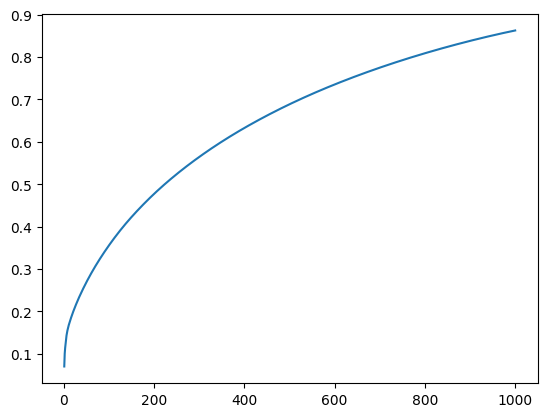

In [69]:
import matplotlib.pyplot as plt

pve=np.cumsum(pca.explained_variance_ratio_)

fig, ax=plt.figure(), plt.axes()
ax.plot(range(1, len(pve)+1), pve)


In [70]:
design_matrix_scal_mm_pca

array([[ 2.03935715,  7.25935108,  1.74994029, ...,  0.10571074,
         0.1083679 ,  0.02692073],
       [-2.54178188,  3.81971521,  1.39009071, ..., -0.951178  ,
         0.0449393 , -0.99319386],
       [ 0.18049831,  0.64066252, -2.70877326, ..., -0.13706805,
        -0.01590193,  0.21647708],
       ...,
       [-3.38072839, -0.60221251,  0.45694799, ...,  0.21228171,
         0.49759444,  0.85251908],
       [-3.710464  ,  1.23855313, -0.92367751, ...,  0.5089213 ,
         0.5046133 , -0.04378285],
       [-3.6816926 , -1.15758555, -0.14104224, ..., -0.14209049,
        -0.15588864, -0.18778688]], shape=(1898, 1000))

In [71]:
similarity_score = cosine_similarity(design_matrix_scal_mm_pca)
similarity_score

array([[ 1.        ,  0.04910623,  0.07425223, ..., -0.05908374,
        -0.05053761, -0.06087034],
       [ 0.04910623,  1.        , -0.02451523, ...,  0.07262477,
         0.05642241, -0.01212535],
       [ 0.07425223, -0.02451523,  1.        , ..., -0.03111955,
        -0.04053228, -0.01402488],
       ...,
       [-0.05908374,  0.07262477, -0.03111955, ...,  1.        ,
         0.24311463,  0.15295395],
       [-0.05053761,  0.05642241, -0.04053228, ...,  0.24311463,
         1.        ,  0.15383519],
       [-0.06087034, -0.01212535, -0.01402488, ...,  0.15295395,
         0.15383519,  1.        ]], shape=(1898, 1898))

In [73]:
def recommend(movie_title):
    index=np.where(design_matrix.index==movie_title)[0][0]
    print(index)
    similar_movies = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
    data=[]

    for index, similarity in similar_movies:
        item = []
        temp_df = movies[movies["title"]==design_matrix.index[index]]
        item.extend(temp_df["title"].values)
        data.append(item)

    return data

In [75]:
recommend("Inception (2010)")

842


[['Dark Knight, The (2008)'],
 ['Interstellar (2014)'],
 ['Shutter Island (2010)'],
 ['Inglourious Basterds (2009)'],
 ['Avatar (2009)']]